In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
## Load the data
import os
import pandas as pd

# Get the current working directory
cwd = os.getcwd()
# Load the train data
train_data = pd.read_csv(os.path.join(cwd, 'data', 'train.csv'))
train_data.head()
# Convert categorical variables to numerical variables using LabelEncoder
le = LabelEncoder()
train_data['brand'] = le.fit_transform(train_data['brand'])
train_data['model'] = le.fit_transform(train_data['model'])
train_data['fuel_type'] = le.fit_transform(train_data['fuel_type'])
train_data['engine'] = le.fit_transform(train_data['engine'])
train_data['transmission'] = le.fit_transform(train_data['transmission'])
train_data['ext_col'] = le.fit_transform(train_data['ext_col'])
train_data['int_col'] = le.fit_transform(train_data['int_col'])
train_data['accident'] = le.fit_transform(train_data['accident'])
train_data['clean_title'] = le.fit_transform(train_data['clean_title'])

In [2]:
# Scale numerical variables using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data[['milage', 'model_year', 'price']] = scaler.fit_transform(train_data[['milage', 'model_year', 'price']])

In [4]:
#Feture Selection 
import seaborn as sns
import matplotlib.pyplot as plt

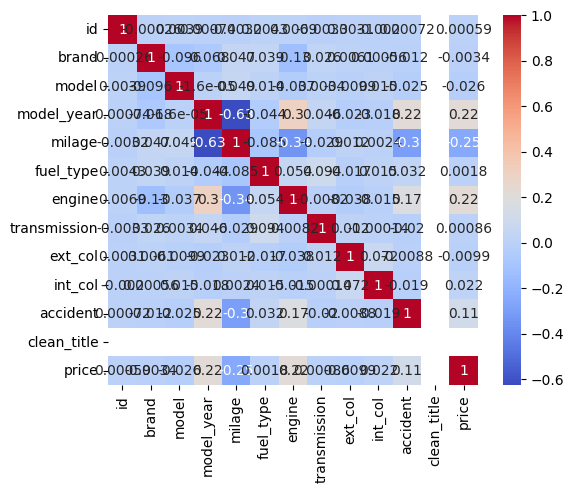

In [5]:
corr_matrix = train_data.corr()

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

In [13]:
#Based on the correlation matrix, we can select the top 5 features that are highly correlated with the price variable:
#**Model Selection**

In [6]:
selected_features = ['milage', 'model_year', 'brand', 'engine', 'transmission']
X = train_data[selected_features]
y = train_data['price']

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Evaluate model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = rf_model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.789520287124956
